In [1]:
import numpy as np
import pandas as pd
import os,time
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data_dir = '/kaggle/input/playground-series-s3e3'
train_data = pd.read_csv(os.path.join(data_dir,'train.csv'))
print(train_data.shape)
train_data.head()

(1677, 35)


,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0,36,Travel_Frequently,599,Research & Development,24,3,Medical,1,4,...,80,1,10,2,3,10,0,7,8,0
1,1,35,Travel_Rarely,921,Sales,8,3,Other,1,1,...,80,1,4,3,3,4,2,0,3,0
2,2,32,Travel_Rarely,718,Sales,26,3,Marketing,1,3,...,80,2,4,3,3,3,2,1,2,0
3,3,38,Travel_Rarely,1488,Research & Development,2,3,Medical,1,3,...,80,0,15,1,1,6,0,0,2,0
4,4,50,Travel_Rarely,1017,Research & Development,5,4,Medical,1,2,...,80,0,31,0,3,31,14,4,10,1


In [3]:
print(train_data.columns)

Index(['id', 'Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition'],
      dtype='object')


In [4]:
# print(train_data.isna().sum())
print('no missing data')

no missing data


In [5]:
print(train_data.dtypes)

id                           int64
Age                          int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYea

In [6]:
## counting the number of unique values in each column
temp = train_data.apply(lambda x: len(x.unique()))
print(temp)
print('')
print('Classes with only 1 unique value')
print(temp[temp == 1])

id                          1677
Age                           43
BusinessTravel                 3
DailyRate                    625
Department                     3
DistanceFromHome              29
Education                      6
EducationField                 6
EmployeeCount                  1
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       6
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome                895
MonthlyRate                  903
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             41
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCom

In [7]:
# train_data.select_dtypes('int64').columns
# train_data.select_dtypes('object').columns

In [8]:
target_col = 'Attrition'

num_cols = ['DistanceFromHome',
       'EnvironmentSatisfaction',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike',
       'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears',
       'WorkLifeBalance','YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']

cat_cols = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime']

## removed the columns with only 1 uniq value

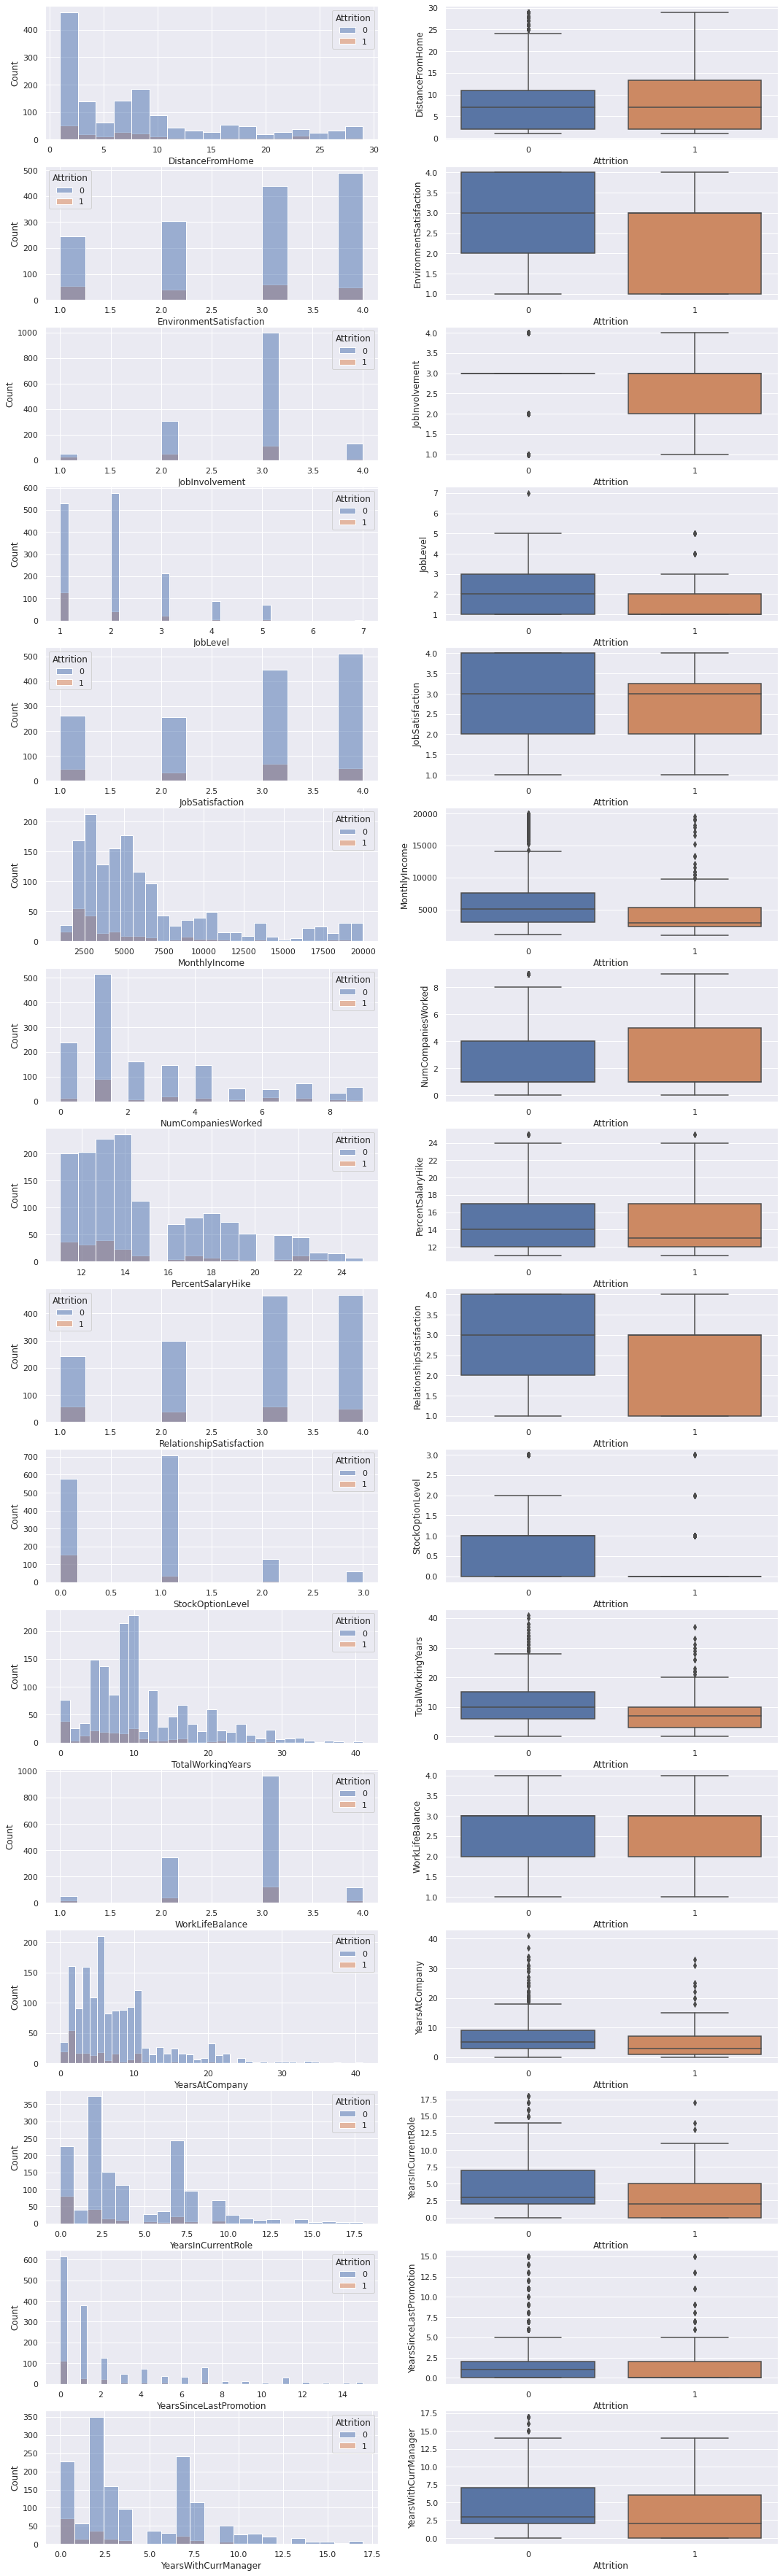

In [9]:
n = len(num_cols)
fig,axes = plt.subplots(n,2,figsize=(18,n*4))
for i in range(n):
    col = num_cols[i]
    sns.histplot(data=train_data,x=col,hue=target_col,ax=axes[i][0])
    sns.boxplot(data = train_data,x=target_col,y=col,ax=axes[i][1])

In [10]:
## Attrition rates are comparatively higher in low @Age groups
## Attrition seems uneffected by @DailyRate
## Attrition seems uneffected by @DistanceFromHome
## Attrition seems higher in less educated @Education
## Attrition seems higher in people with less @EnvironmentSatisfaction
## Attrition seems uneffected by @HourlyRate
## Almost all people who dont leave have @JobInvovement equal to 3 and those who leave have less than 3
## Attrition seems higher for low level jobs @JobLevel
## Attrition seems higher in people with less @JobSatisfation
## Attrition seems higher in people with less @MonthlyIncome
## Attrition seems uneffected by @MonthlyRate
## Attrition seems high for people in their 2nd job @NumCompaniesWorked
## Attrition seems high is people with less @RelationshipSatisfaction
## Attrition seems high is people with@StockOption
## Attrition seems uneffected by @TrainingTimesLastYear (no surprise here)
## Attrition seems uneffected by @WorkLifeBalance

In [11]:
import os,time
import json
import numpy as np
import pandas as pd

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder,FunctionTransformer,OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score

In [12]:
all_cols = num_cols+cat_cols

In [13]:
X = train_data[all_cols]
y = train_data[target_col].values
print(X.shape,y.shape)

(1677, 23) (1677,)


In [14]:
train_x,test_x,train_y,test_y = train_test_split(X,y,test_size = 0.3,random_state=0)
print(train_x.shape,train_y.shape)
print(test_x.shape,test_y.shape)

(1173, 23) (1173,)
(504, 23) (504,)


In [15]:
def log_transform(x):
    return np.log(1+x)

num_transformer = Pipeline(steps=[
    ('scaler',StandardScaler())
#     ('log_transform',FunctionTransformer(log_transform))
])

cat_transformer = Pipeline(steps=[
    ('ord_enc',OrdinalEncoder()),
    ('one_hot',OneHotEncoder(drop='first'))
])

preprocessor = ColumnTransformer(transformers=[
    ('cat',cat_transformer,cat_cols),
    ('num',num_transformer,num_cols)
])

pipeline = Pipeline(steps=[
    ('preprocessor',preprocessor),
#     ('model',LogisticRegression(C=1000,solver='liblinear'))
#     ('model',SVC(kernel='rbf',probability=True))
#     ('model',SVC(kernel='linear'))
#     ('model',xgb.XGBClassifier())
#     ('model',DecisionTreeClassifier(max_depth=100))
    ('model',RandomForestClassifier(n_estimators=500,max_depth=10))
])

In [16]:
model = pipeline.fit(train_x,train_y)
model.score(test_x,test_y)

0.875

In [17]:
preds = model.predict(test_x)
pred_probs = model.predict_proba(test_x)[:,1]

In [18]:
print(confusion_matrix(test_y,preds))
print(classification_report(test_y,preds))

[[437   2]
 [ 61   4]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.93       439
           1       0.67      0.06      0.11        65

    accuracy                           0.88       504
   macro avg       0.77      0.53      0.52       504
weighted avg       0.85      0.88      0.83       504



In [19]:
print(roc_auc_score(test_y,pred_probs))

0.862659891361486


In [20]:
## create submissions

In [21]:
test_data = pd.read_csv(os.path.join(data_dir,'test.csv'))
print(test_data.shape)
test_data.head()

(1119, 34)


,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1677,19,Non-Travel,992,Research & Development,1,1,Medical,1,4,...,4,80,0,1,2,2,1,0,0,0
1,1678,45,Travel_Rarely,1136,Sales,4,4,Marketing,1,3,...,3,80,1,7,3,3,2,2,2,2
2,1679,37,Travel_Rarely,155,Research & Development,13,3,Life Sciences,1,4,...,2,80,2,13,2,2,7,7,1,7
3,1680,32,Travel_Rarely,688,Research & Development,1,4,Life Sciences,1,3,...,3,80,0,14,2,2,14,10,11,8
4,1681,29,Travel_Frequently,464,Research & Development,9,1,Life Sciences,1,3,...,1,80,0,1,5,3,1,0,0,0


In [22]:
test_pred_probs = model.predict_proba(test_data[all_cols])[:,1]

In [23]:
subs = pd.read_csv(os.path.join(data_dir,'sample_submission.csv'))
subs.head()

,id,Attrition
0,1677,0.119261
1,1678,0.119261
2,1679,0.119261
3,1680,0.119261
4,1681,0.119261


In [24]:
subs['Attrition'] = test_pred_probs
subs.to_csv('submission1.csv',index=False)